# Dataset Analysis



This objective of this notebook is dataset analysis, outliers detection and in general insight gathering over the dataset itself.

No real major modifications / augmentation techniques are done here, besides outliers and meaningless data removal.

## Google Drive - Connecting to the project

In [1]:
from google.colab import drive
import sys
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Colab Notebooks/ANN/le acque del friuli - Homework 2"
%cd {project_path}
sys.path.append(project_path)

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1CRSDpvo8yN6Wc7UchdjWSs6h8RroV7e4/le acque del friuli - Homework 2


## Imports

In [2]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## Data loading

In [3]:
# Parameters for importing the dataset and defining the images size
DATASET_FILE_NAME = "mars_for_students.npz"
INPUT_SHAPE = (64, 128, 1)

In [4]:
# Loading the provided dataset
data = np.load("dataset/" + DATASET_FILE_NAME)

training_set = data["training_set"]
test_set = data["test_set"]

images = training_set[:, 0]
labels = training_set[:, 1]

print("Images shape:", images.shape, "Labels shape:", labels.shape)

Images shape: (2615, 64, 128) Labels shape: (2615, 64, 128)


## Data analysis and preprocessing

In [5]:
# Defining the known classes
classes = {
    0: "Background",
    1: "Soil",
    2: "Bedrock",
    3: "Sand",
    4: "Big Rock"
}

num_classes = len(classes)

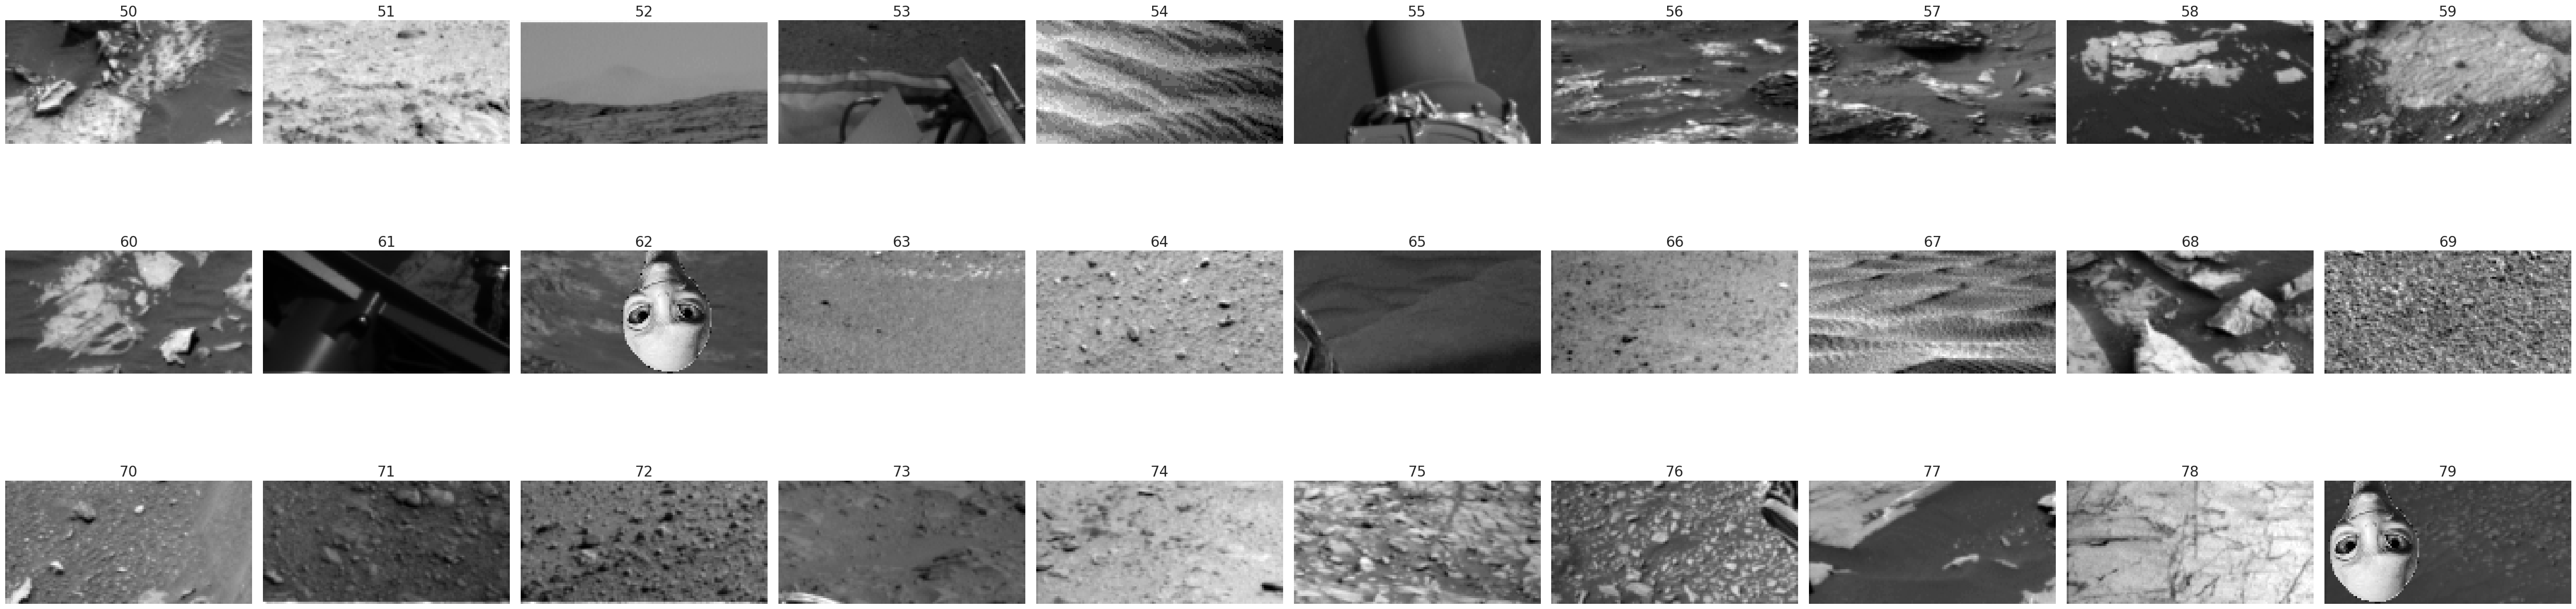

In [6]:
# Define the grid dimensions
num_rows = 3
num_cols = 10

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through images and display them in the grid
# Uncomment the line in the if to show the labels
for i in range(num_rows * num_cols):
    if i < len(images):
        axes[i].imshow(images[i+50], cmap='gray')
        axes[i].set_title(i+50, fontsize=20)
        axes[i].axis('off')
    else:
        axes[i].axis('off')

# Show the images
plt.tight_layout()
plt.show()

## Outliers Detection

### Aliens Removal


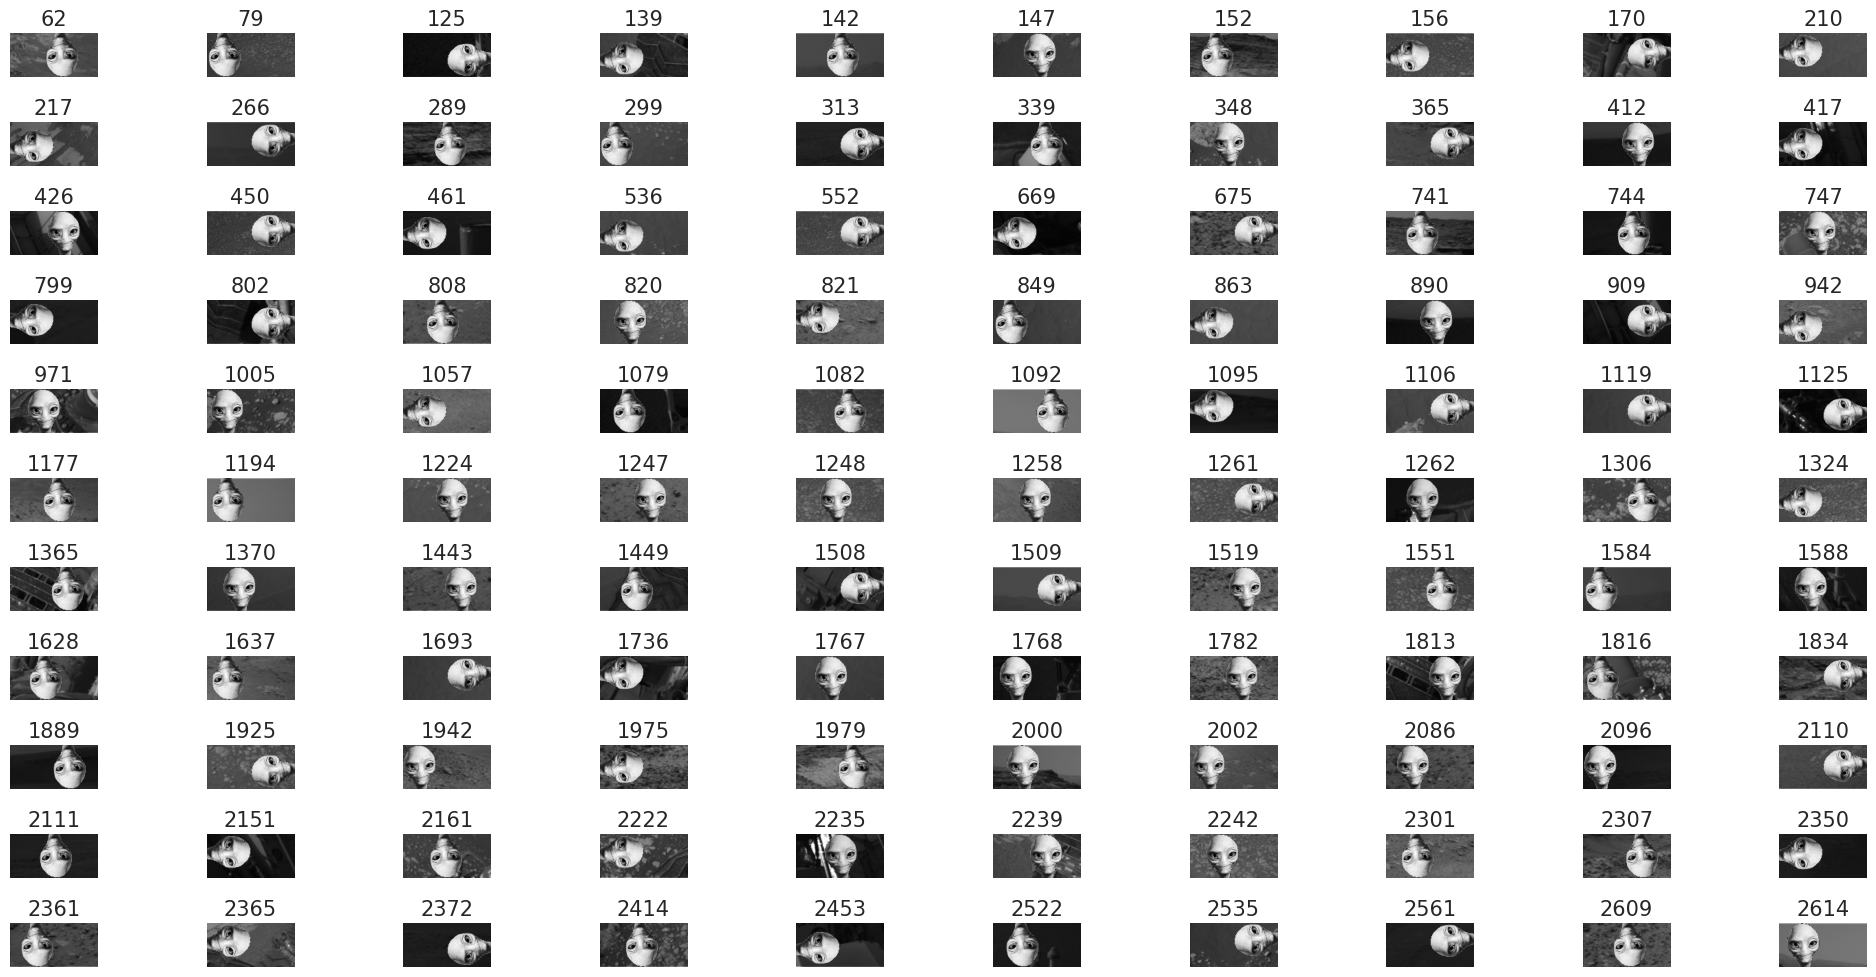

In [7]:
# Manually Detected Aliens :
outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299,
            313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741,
            744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005,
            1057, 1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247,
            1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509,
            1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813,
            1816, 1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110,
            2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365,
            2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]

# Plotting the memes
num_cols = 10
num_rows = len(outliers) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()
for i in range(num_rows * num_cols):
    axes[i].imshow(images[outliers[i]], cmap='gray')
    axes[i].set_title(outliers[i], fontsize=15)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Creating a colormap
colormap = plt.cm.viridis(np.linspace(0, 1, num_classes))


In [9]:
# Create legend elements (squares with colors)
legend_elements = []
for i in range(num_classes):
    color = colormap[i]
    patch = mpatches.Patch(color=color, label=f'{classes[i]}')  # Create a square patch
    legend_elements.append(patch)

In [10]:
# Plotting images util
def plot(images, labels, num_samples=3):
    """
    Display some image and label pairs from the dataset.
    """
    rand_idx = random.sample(range(0,len(images)),num_samples)
    plt.figure(figsize=(10, 4*num_samples))

    for i in range(num_samples):
        image = images[rand_idx[i]]
        label = labels[rand_idx[i]]
        label_np = np.array(label)

        # Plot original image
        plt.subplot(num_samples, 2, i*2 + 1)
        plt.imshow(image,cmap='gray')
        plt.title(f'Image {rand_idx[i]}')
        plt.axis('off')

        # Plot colored label
        plt.subplot(num_samples, 2, i*2 + 2)
        colored_label = colormap[label_np.astype(int)]
        plt.imshow(colored_label)
        plt.title(f'Label {rand_idx[i]}')
        plt.axis('off')
        plt.legend(handles=legend_elements, loc='upper right', title='Classes')


    plt.tight_layout()
    plt.show()
    plt.close()

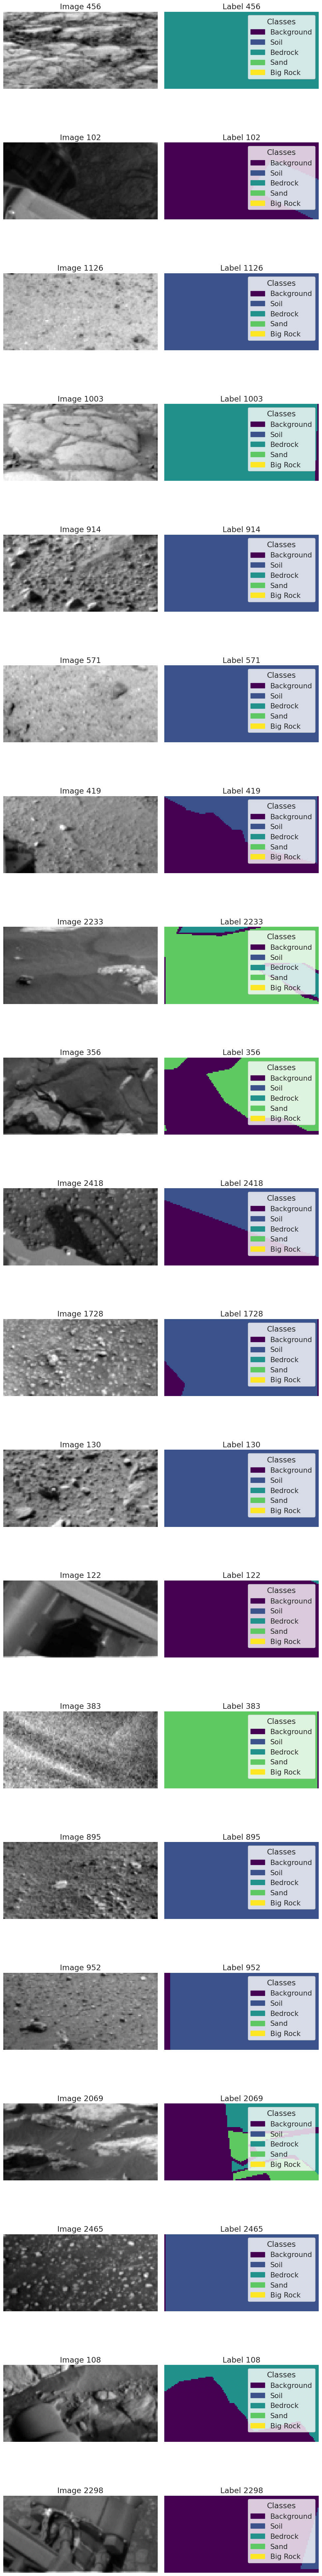

In [11]:
plot(images, labels, num_samples=20)

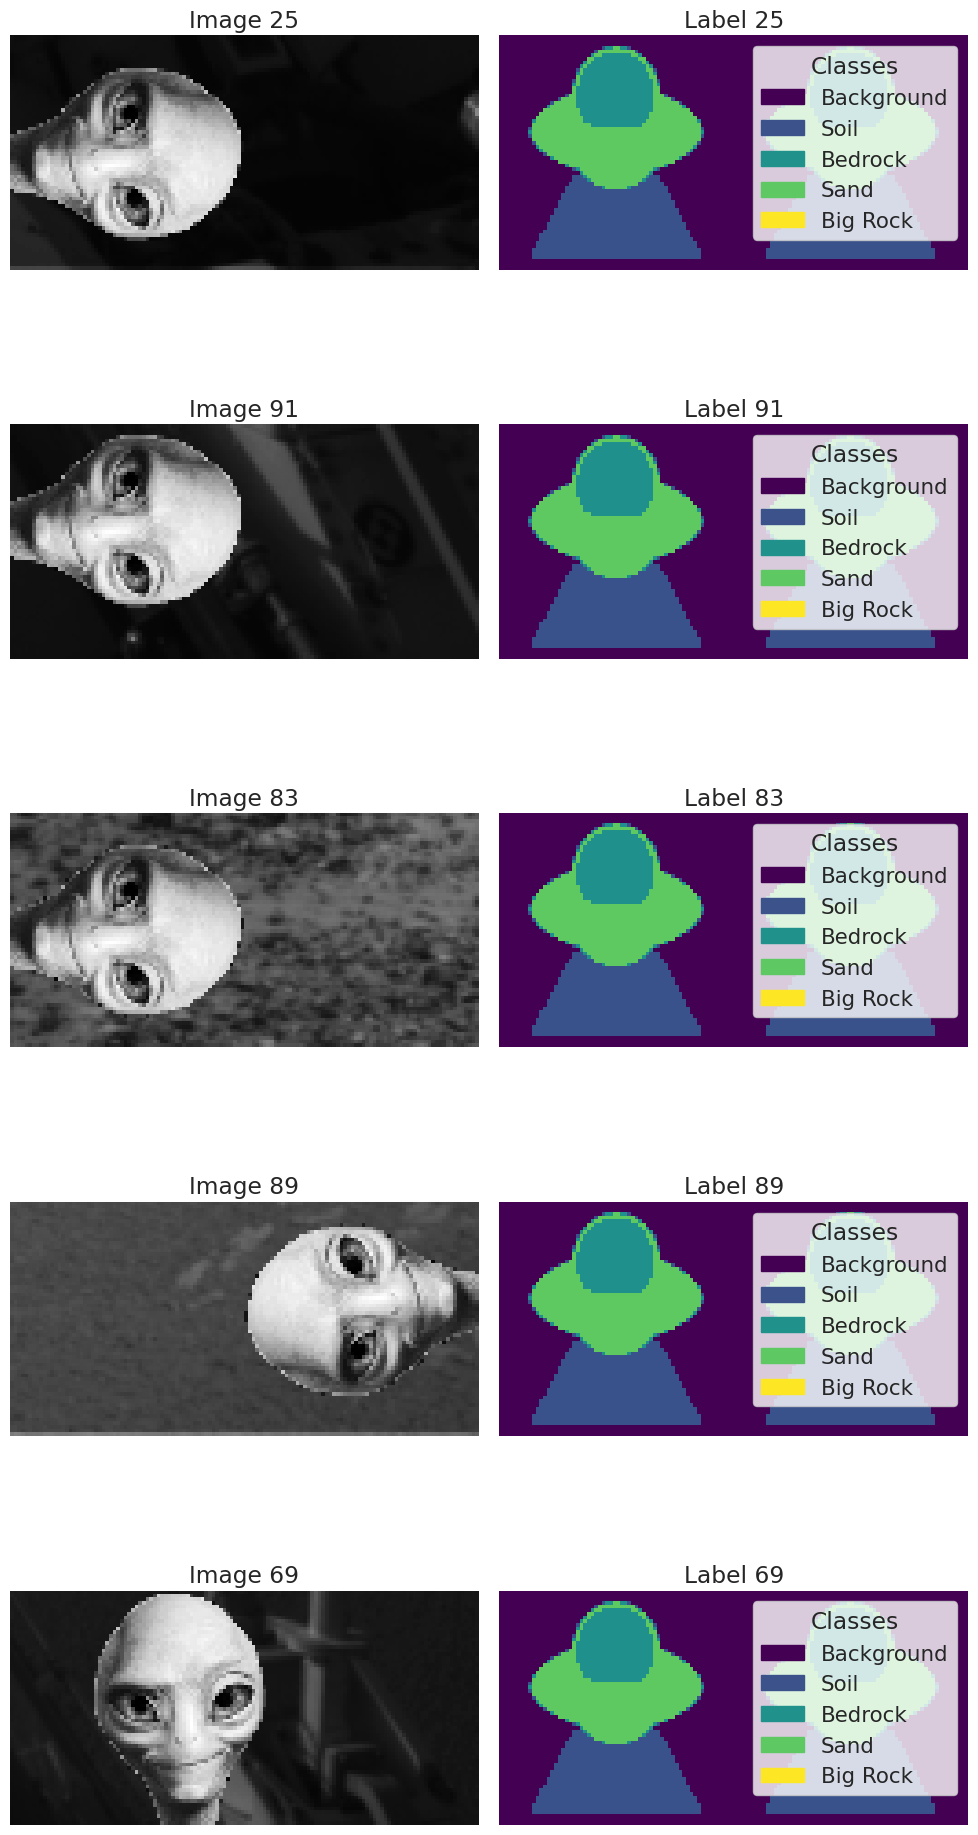

In [12]:
plot(images[outliers], labels[outliers], num_samples=5)

In [13]:
# Checking if all aliens have the same label
alien_lbl = labels[outliers[0]]
assert all([np.array_equal(alien_lbl, labels[i]) for i in outliers])

Since all manually spotted aliens have the same label, we'll just remove all the images that have that exact label

In [14]:
# Finding outliers
spotted_outliers = [i for i in range(len(images)) if np.array_equal(labels[i], alien_lbl)]
assert spotted_outliers == outliers # we actually spotted them all manually...

### Background Removal

Since background is not relevant during classification, we decided to remove all the samples that have full background labels (even if they are just 7 samples)

In [15]:
# Finding full background
background = np.where(np.all(labels==0,axis=(1,2)))[0]
print("Background indexes:",background,"\nBackground Count:", len(background))

Background indexes: [ 495  531  926 1417 1434 1681 2064] 
Background Count: 7


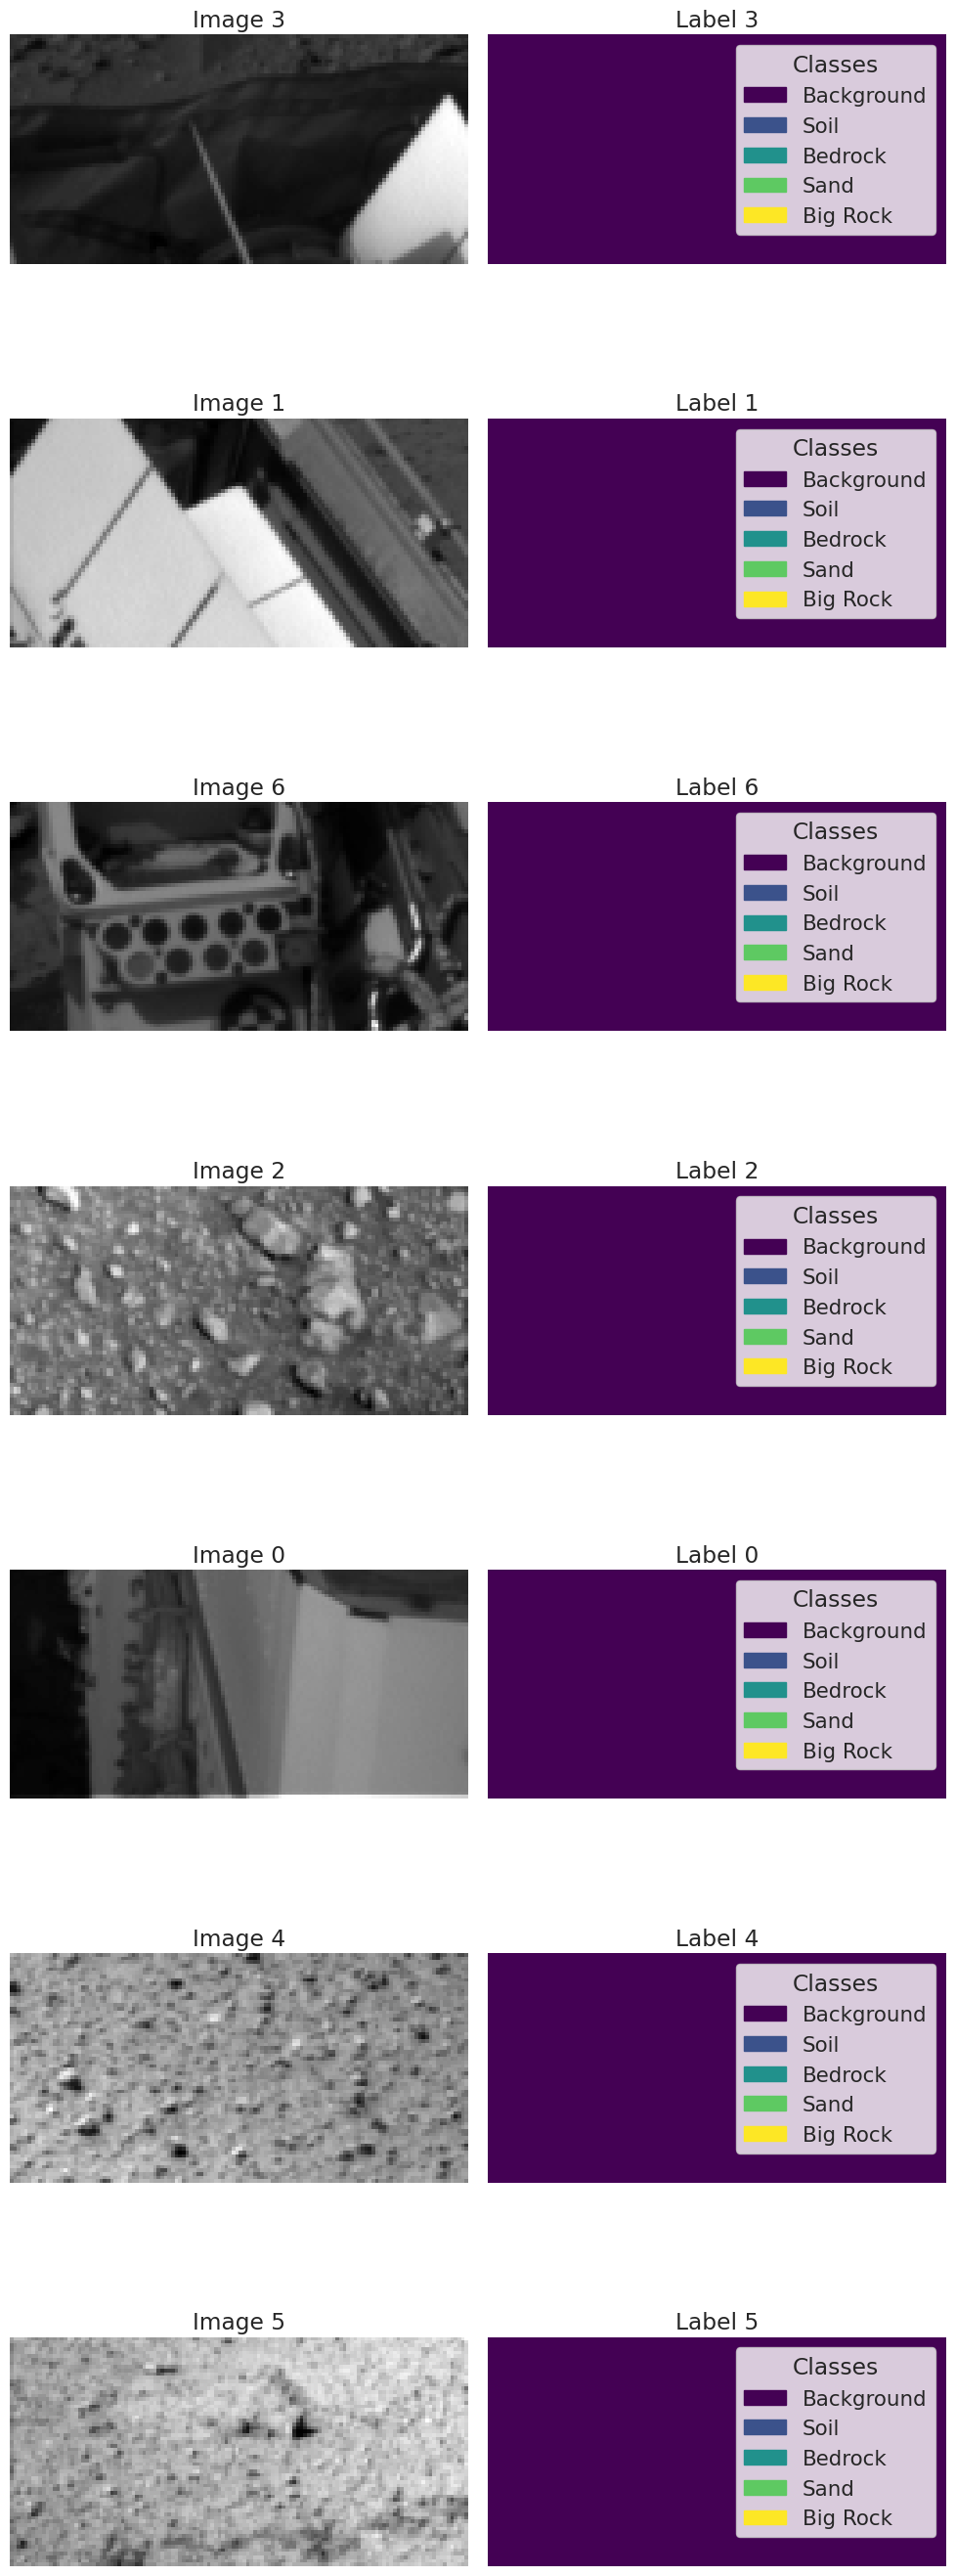

In [16]:
plot(images[background], labels[background], num_samples=7)

## Saving a new Dataset

In [17]:
# Deleting the chosen datapoints
to_delete_idx = np.concatenate((background, spotted_outliers))
new_images = np.delete(images, to_delete_idx, axis=0)
new_labels = np.delete(labels, to_delete_idx, axis=0)

In [18]:
# Saving a new npz
np.savez_compressed('dataset/cleaned_dataset.npz', images=new_images, labels=new_labels, test_set=test_set)

In [19]:
# Reloading the npz to check shape
data = np.load('dataset/cleaned_dataset.npz')
print(data['images'].shape)
print(data['labels'].shape)

(2498, 64, 128)
(2498, 64, 128)


In [20]:
# From now on we'll use the new dataset
labels = data['labels']
images = data['images']

## Analysing class balance

In [21]:
# Counting class frequency
flattened_labels = labels.flatten().astype(int)
frequencies = np.bincount(flattened_labels)

In [22]:
# Calculate inverse frequency weights
class_weights = 1.0 / frequencies

# Normalize weights (optional)
class_weights /= np.sum(class_weights)
print("Class Counts : ",frequencies,"\nClass Weights without further modifications:",class_weights)

Class Counts :  [4931482 6957538 4776810 3770823   26963] 
Class Weights without further modifications: [0.00534911 0.00379143 0.00552231 0.00699556 0.97834159]


Since the fifth class (BIG ROCKS) is extremely unbalanced, it might be a good idea to use class balancing or weighted loss functions.

In [23]:
# Finding BIG ROCKS
big_rocks = np.where(np.any(labels==4,axis=(1,2)))[0]
print("Big Rock indexes:",big_rocks,"\nBig Rock Count:", len(big_rocks))

Big Rock indexes: [  31   56   57  140  145  158  162  241  326  382  406  443  470  474
  570  612  726  735  737  811  830  847  854  870  919  982 1023 1027
 1122 1159 1165 1166 1179 1263 1334 1438 1451 1470 1486 1521 1522 1539
 1571 1627 1678 1775 1786 1877 1913 2007 2048 2079 2095 2104 2149 2186
 2192 2246 2324 2344 2405 2410 2491] 
Big Rock Count: 63


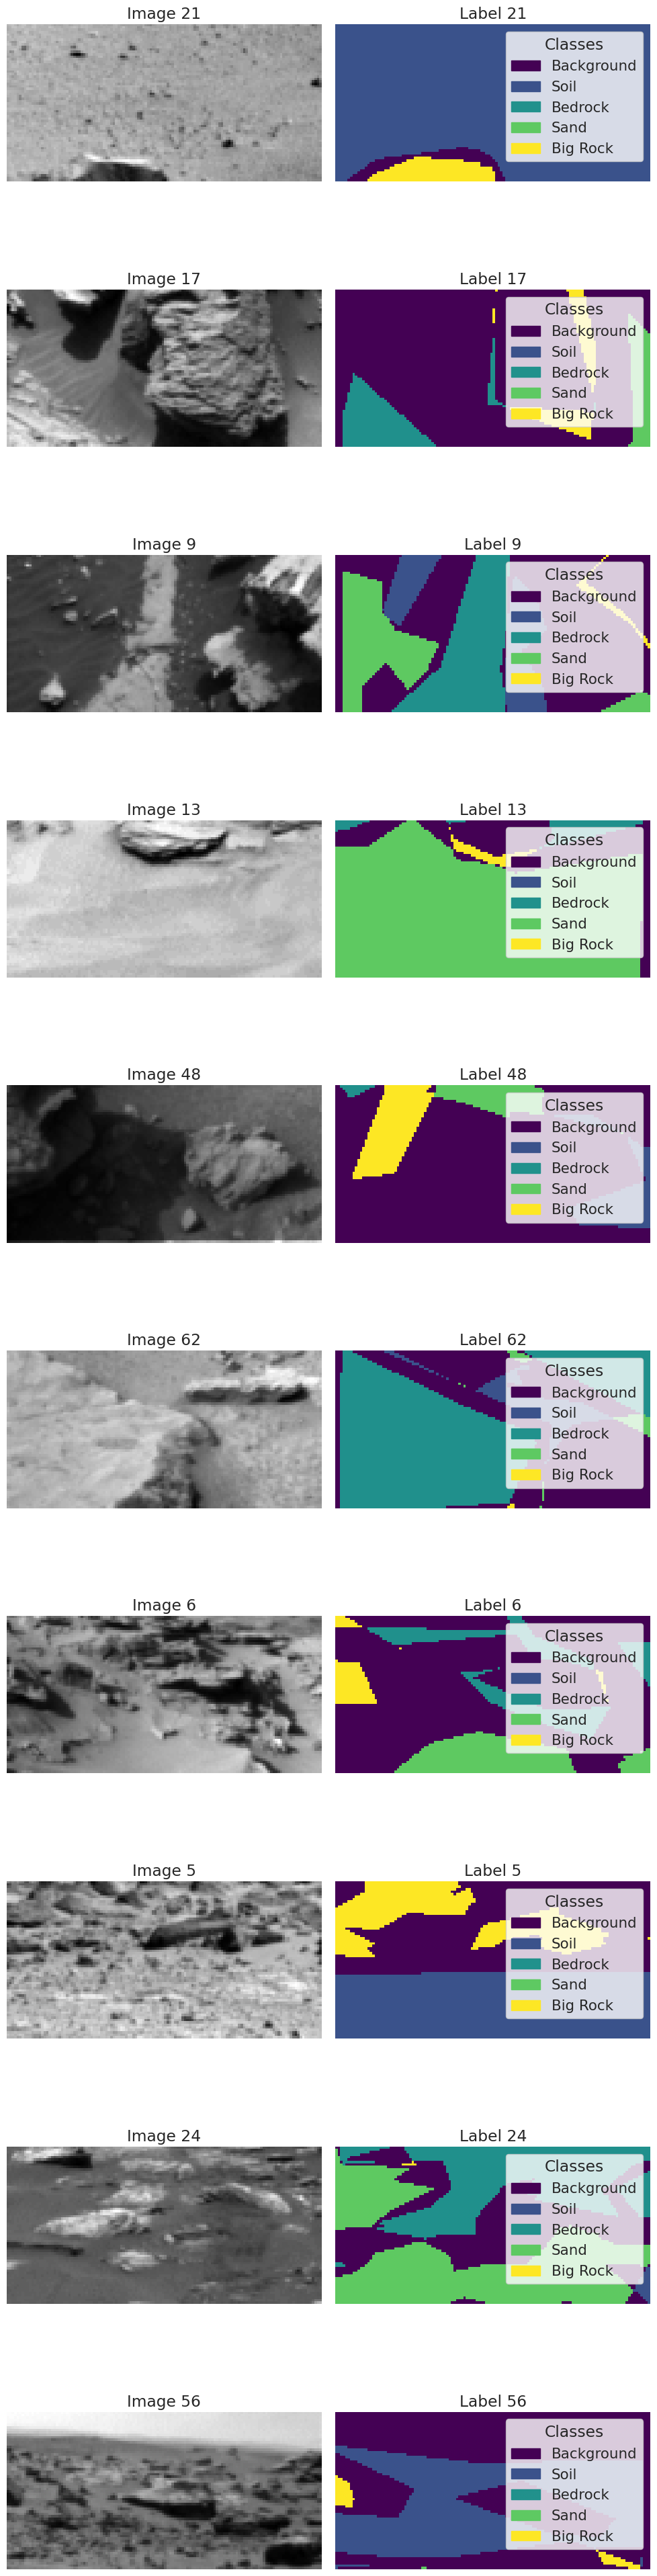

In [24]:
plot(images[big_rocks],labels[big_rocks],num_samples=10)

## Analysing Color Distribution

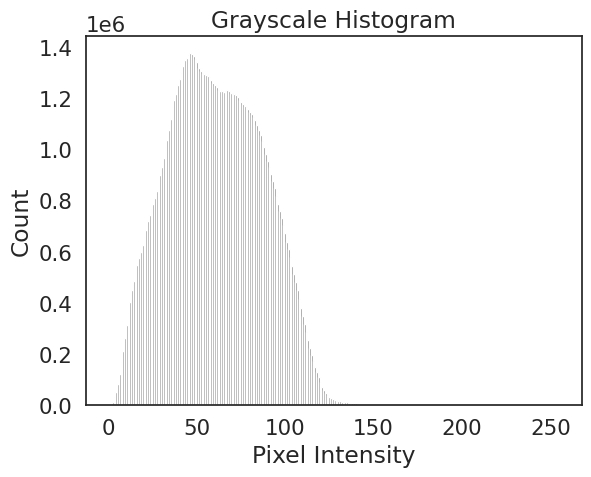

In [25]:
all_images = np.concatenate([images,test_set])
# Assume images is a list of 2D numpy arrays
all_pixels = np.concatenate([img.flatten() for img in all_images])

# Compute histogram
hist, bins = np.histogram(all_pixels, bins=256, range=(0, 255))

# Plot histogram
plt.hist(all_pixels, bins=256, range=(0, 255), color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Grayscale Histogram')
plt.show()

Since the images are not well distributed among the available scale, it might be a good idea to equalize them to distribute the data over the available range of values

In [26]:
# Image Equalization

# Compute global histogram
all_pixels = np.concatenate([img.flatten() for img in all_images])
hist, bins = np.histogram(all_pixels, bins=256, range=(0, 255))

# Compute global CDF
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
global_lut = np.clip(cdf_normalized, 0, 255).astype(np.uint8)

# Apply the same transformation to all images
def apply_global_equalization(img, lut):
    return lut[img.astype(int)]

normalized_images = [apply_global_equalization(img, global_lut) for img in images]
normalized_test = [apply_global_equalization(img, global_lut) for img in test_set]

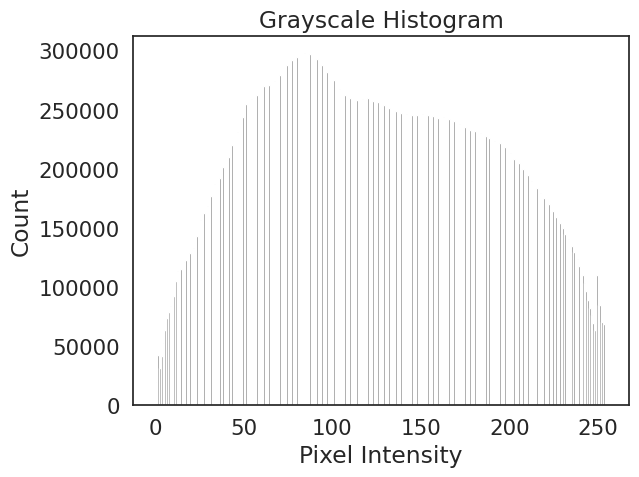

In [27]:
all_normalized_pixels = np.concatenate([img.flatten() for img in normalized_images])

# Compute histogram
hist, bins = np.histogram(all_normalized_pixels, bins=256, range=(0, 255))

plt.hist(all_normalized_pixels, bins=256, range=(0, 255), color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Grayscale Histogram')
plt.show()

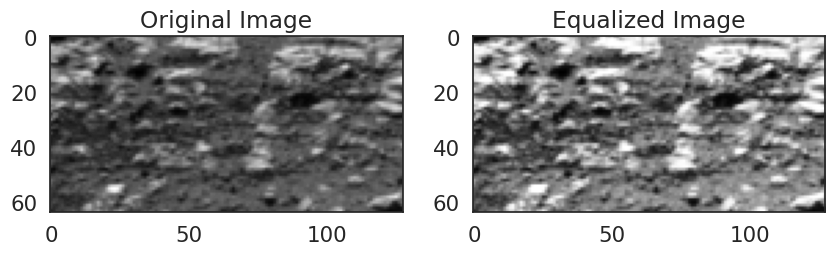

In [28]:
idx = 16

# Plot the first image from the original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[idx], cmap='gray')
plt.title("Original Image")

# Plot the first image from the normalized dataset
plt.subplot(1, 2, 2)
plt.imshow(normalized_images[idx], cmap='gray')
plt.title("Equalized Image")

plt.show()

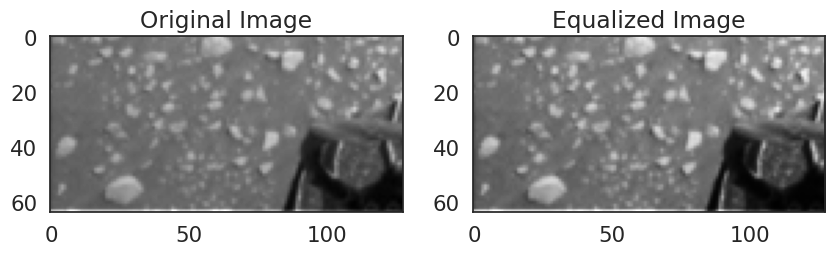

In [29]:
idx = 12

# Plot the first image from the original dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_set[idx], cmap='gray')
plt.title("Original Image")

# Plot the first image from the normalized dataset
plt.subplot(1, 2, 2)
plt.imshow(normalized_test[idx], cmap='gray')
plt.title("Equalized Image")

plt.show()

This improves the interpretability of the image

In [30]:
# Saving the normalized dataset, including normalized test
np.savez_compressed('dataset/cleaned_normalized_dataset.npz', images=normalized_images, labels=labels, test_set=normalized_test)

# Particular Augmentations

In [31]:
# Colormapping Images
def color_img(image):
    image = (image * 255).astype(np.uint8)
    return cv2.applyColorMap(image, cv2.COLORMAP_HSV) # https://docs.opencv.org/3.4/d3/d50/group__imgproc__colormap.html


idx = 30

original = images[idx]
original_lbl = labels[idx]
colored = color_img(original)

# Plot the original and colored image
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original,cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Colored")
plt.imshow(colored)

plt.subplot(1, 3, 3)
plt.title("Label")
plt.imshow(colored)
plt.imshow(np.argmax(original_lbl, axis=-1), cmap='jet', alpha=0.9)  # Overlay label with transparency

plt.show()

NameError: name 'cv2' is not defined

## Looking at the test set

In [ ]:
# Define the grid dimensions
num_rows = 3
num_cols = 10

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

offset = np.random.randint(0, len(images))
# Loop through images and display them in the grid
# Uncomment the line in the if to show the labels
for i in range(num_rows * num_cols):
    if i+offset < len(images):
        axes[i].imshow(test_set[i+offset], cmap='gray')
        axes[i].set_title(i+offset, fontsize=20)
        axes[i].axis('off')
    else:
        axes[i].axis('off')

# Show the images
plt.tight_layout()
plt.show()